# Exercise 9

## Mashable news stories analysis

Predicting if a news story is going to be popular


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/albahnsen/PracticalMachineLearningClass/master/datasets/mashable.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [68]:
train_df=df
train_df.shape

(6000, 61)

In [69]:
X = train_df.drop(['url', 'Popular'], axis=1)
y = train_df['Popular']

In [70]:
y.mean()

0.5

In [71]:
# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Exercise 9.1

Estimate a Decision Tree Classifier and a Logistic Regresion

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

models = {'lr': LinearRegression(),
          'dt': DecisionTreeRegressor()}

In [73]:
# Train all the models

for model in models.keys():
    models[model].fit(X_train, y_train)

In [74]:
# predict test for each model
y_pred = pd.DataFrame(index=y_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)

In [75]:
# Evaluate each model
from sklearn.metrics import mean_squared_error
import numpy as np
#Convertir en booleana la salida del modelo Lineal
y_pred['lr']= np.where(y_pred['lr']>=0.5, 1,0)

print('MSE para los modelos:')
for model in models.keys():
    print(model,np.sqrt(mean_squared_error(y_pred[model], y_test)))

MSE para los modelos:
lr 0.5988878581726855
dt 0.6747839160304084


In [76]:
print('F1 para los modelos:')
for model in models.keys():
    print(model,metrics.f1_score(y_pred[model], y_test))
print('\n')
print('Accuracy para los modelos:')
for model in models.keys():   
    print(model,metrics.accuracy_score(y_pred[model], y_test))

F1 para los modelos:
lr 0.6299862448418158
dt 0.5413028878441907


Accuracy para los modelos:
lr 0.6413333333333333
dt 0.5446666666666666


El modelo Lineal tiene un desempeño ligeramente superior al modelo de arbol de decisión.

# Exercise 9.2

Estimate 300 bagged samples

Estimate the following set of classifiers:

* 100 Decision Trees where max_depth=None
* 100 Decision Trees where max_depth=2
* 100 Logistic Regressions

In [121]:
#Modelos
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression


In [119]:
# set a seed for reproducibility
np.random.seed(524)

n_samples = X_train.shape[0]
n_B = 300

# create ten bootstrap samples (will be used to select rows from the DataFrame)
samples = [np.random.choice(a=n_samples, size=n_samples, replace=True) for _ in range(1, n_B +1 )]

In [139]:
np.random.seed(524) 
seeds = np.random.randint(1, 10000, size=n_B)
models = {}
y_pred_subset = pd.DataFrame(index=X_test.index, columns=list(range(n_B)))


for i in range(100):
    models[i] = DecisionTreeClassifier(max_depth=None, random_state=seeds[i])
    models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    y_pred_subset.iloc[:, i] = models[i].predict(X_test)
    
for i in range(100,200):
    models[i] = DecisionTreeClassifier(max_depth=2, random_state=seeds[i])
    models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    y_pred_subset.iloc[:, i] = models[i].predict(X_test)
    
for i in range(200,300):
    models[i] = LogisticRegression(random_state=seeds[i])
    models[i].fit(X_train.iloc[samples[i]], y_train.iloc[samples[i]])
    y_pred_subset.iloc[:, i] = models[i].predict(X_test)

In [140]:
y_pred_subset.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
1483,1,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2185,1,0,0,1,1,1,0,0,1,1,...,1,1,1,1,1,1,1,1,1,1
2520,0,1,1,0,1,1,0,0,0,1,...,1,1,1,1,1,1,1,1,1,1
3721,1,1,1,0,0,0,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
3727,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
from sklearn import metrics

y_pred_bagging=y_pred_subset.mean(axis=1)
y_pred_int=np.where(y_pred_bagging>=0.5, 1,0 )

y_pred_int

array([1, 1, 1, ..., 1, 0, 0])

# Exercise 9.3

Ensemble using majority voting

Evaluate using the following metrics:
* Accuracy

* F1-Score

In [143]:
print('Accuracy: ', metrics.accuracy_score(y_pred_int, y_test))
print('F1 Score: ', metrics.f1_score(y_pred_int, y_test))

Accuracy:  0.6386666666666667
F1 Score:  0.6267217630853995


En este caso no se observa mejora en los indicadores respecto al resultado del ejercicio 9.1.

# Exercise 9.4

Estimate te probability as %models that predict positive

Modify the probability threshold and select the one that maximizes the F1-Score

In [212]:
from decimal import *
threshold=np.arange(0.1, 1, 0.025)
threshold    

array([0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225, 0.25 , 0.275, 0.3  ,
       0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 , 0.475, 0.5  , 0.525,
       0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675, 0.7  , 0.725, 0.75 ,
       0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  , 0.925, 0.95 , 0.975])

In [213]:
from array import array
F1Scores = []

In [224]:
y_pred_int=pd.DataFrame()

for i in range(len(threshold)):
    y_pred_int[i]=np.where(y_pred_bagging>=threshold[i], 1,0 )
    F1Scores.append(metrics.f1_score(y_pred_int[i], y_test))
    print(threshold[i],F1Scores[i])   

0.1 0.7031175059952038
0.125 0.7058823529411765
0.15 0.7057569296375267
0.175 0.6951151038742279
0.19999999999999998 0.6883343006384215
0.22499999999999998 0.681384248210024
0.24999999999999997 0.672319806178074
0.27499999999999997 0.6707466340269278
0.29999999999999993 0.6683046683046683
0.32499999999999996 0.667905824039653
0.35 0.6654205607476635
0.3749999999999999 0.6599369085173501
0.3999999999999999 0.6568313021167416
0.42499999999999993 0.6562296151337247
0.44999999999999996 0.6454183266932271
0.47499999999999987 0.6387575962187712
0.4999999999999999 0.6267217630853995
0.5249999999999999 0.6076487252124645
0.5499999999999999 0.595959595959596
0.5749999999999998 0.5932452276064611
0.5999999999999999 0.5936343449296817
0.6249999999999999 0.5863874345549738
0.6499999999999998 0.5864661654135339
0.6749999999999998 0.5794676806083651
0.6999999999999998 0.5753634276970161
0.7249999999999999 0.5681114551083591
0.7499999999999999 0.5564263322884013
0.7749999999999998 0.5408000000000001


Text(0,0.5,'F1Score')

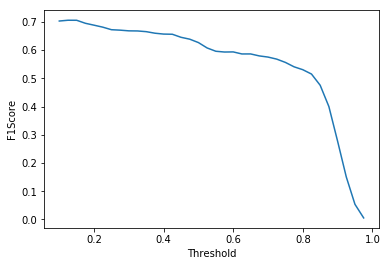

In [216]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(threshold, F1Scores)
plt.xlabel('Threshold')
plt.ylabel('F1Score')


El mayor F1 Score se consigue con umbral en 0.125

# Exercise 9.5

Ensemble using weighted voting using the oob_error

Evaluate using the following metrics:
* Accuracy
* F1-Score

In [226]:
samples_oob = []
# show the "out-of-bag" observations for each sample
for sample in samples:
    samples_oob.append(sorted(set(range(n_samples)) - set(sample)))

In [243]:
n_estimators=300

In [246]:
sampleerrors = np.zeros(n_estimators)
errors = np.zeros(n_estimators)

for i in range(n_estimators):
    y_pred_ = models[i].predict(X_train.iloc[samples_oob[i]])
    errors[i] = 1 - metrics.accuracy_score(y_train.iloc[samples_oob[i]], y_pred_)

Text(0.5,1,'OOB error of each tree')

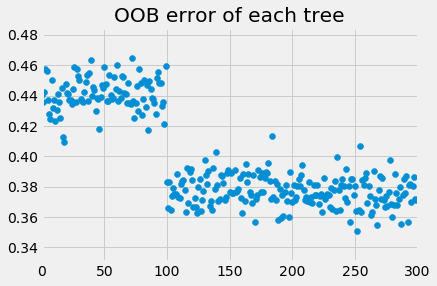

In [248]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

plt.scatter(range(n_estimators), errors)
plt.xlim([0, n_estimators])
plt.title('OOB error of each tree')

Estimación de $\alpha$

In [249]:
alpha = (1 - errors) / (1 - errors).sum()

In [252]:
weighted_sum_1 = ((y_pred_subset) * alpha).sum(axis=1)

In [253]:
weighted_sum_1.head(20)

1483    0.913455
2185    0.894952
2520    0.851316
3721    0.909924
3727    0.086182
4524    0.536347
234     0.044655
4735    0.133405
5839    0.377191
2939    0.833013
3053    0.882142
867     0.882137
276     0.882246
5798    0.095759
3512    0.913331
5789    0.052644
3198    0.885498
5908    0.941300
5718    0.145313
2687    0.060299
dtype: float64

In [255]:
y_pred = (weighted_sum_1 >= 0.5).astype(np.int)

print('F1 Socre: ', metrics.f1_score(y_pred, y_test))
print('Accuracy: ', metrics.accuracy_score(y_pred, y_test))

F1 Socre:  0.6256906077348066
Accuracy:  0.6386666666666667


# Exercise 9.6

Estimate te probability of the weighted voting

Modify the probability threshold and select the one that maximizes the F1-Score

In [256]:
threshold=np.arange(0.1, 1, 0.025)
F1Scores = []

for i in range(len(threshold)):
    y_pred_int[i]=np.where(weighted_sum_1>=threshold[i], 1,0 )
    F1Scores.append(metrics.f1_score(y_pred_int[i], y_test))
    print(threshold[i],F1Scores[i])  

0.1 0.7008797653958945
0.125 0.7040658775090066
0.15 0.6998904709748084
0.175 0.6905574516496018
0.19999999999999998 0.6854460093896714
0.22499999999999998 0.6774969915764139
0.24999999999999997 0.6711327649208283
0.27499999999999997 0.6695278969957081
0.29999999999999993 0.6687154271665642
0.32499999999999996 0.6662531017369727
0.35 0.662492172824045
0.3749999999999999 0.6603535353535354
0.3999999999999999 0.6550836550836551
0.42499999999999993 0.6553524804177546
0.44999999999999996 0.642238507661559
0.47499999999999987 0.6387575962187712
0.4999999999999999 0.6256906077348066
0.5249999999999999 0.6066619418851878
0.5499999999999999 0.5966690803765388
0.5749999999999998 0.5936811168258633
0.5999999999999999 0.5936343449296817
0.6249999999999999 0.5870052277819269
0.6499999999999998 0.5854025583145221
0.6749999999999998 0.5813777441332324
0.6999999999999998 0.5758039816232772
0.7249999999999999 0.5698841698841699
0.7499999999999999 0.5616224648985959
0.7749999999999998 0.543720190779014

Text(0,0.5,'F1Score')

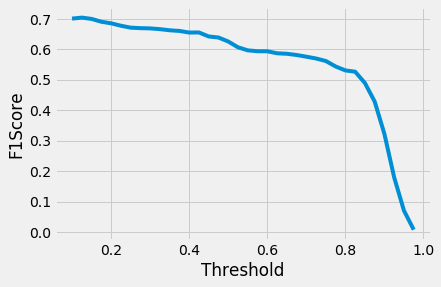

In [257]:
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(threshold, F1Scores)
plt.xlabel('Threshold')
plt.ylabel('F1Score')

El mayor F1 Score se consigue con umbral en 0.125

# Exercise 9.7

Estimate a logistic regression using as input the estimated classifiers

Modify the probability threshold such that maximizes the F1-Score

In [259]:
X_train_2 = pd.DataFrame(index=X_train.index, columns=list(range(n_estimators)))

for i in range(n_estimators):
    X_train_2[i] = models[i].predict(X_train)

In [260]:
X_train_2.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
2420,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1225,1,1,1,1,1,1,1,1,0,1,...,1,1,1,1,1,1,1,1,1,1
324,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
5863,1,1,0,1,1,1,1,1,0,0,...,1,0,1,0,1,1,1,1,1,1
86,1,1,1,0,1,1,1,0,1,0,...,1,1,1,1,0,1,1,1,1,0


In [261]:
from sklearn.linear_model import LogisticRegressionCV
lr = LogisticRegressionCV(cv = 5 )
lr.fit(X_train_2, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=5, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [264]:
y_pred = lr.predict(y_pred_subset)

In [265]:
print('F1 Socre: ', metrics.f1_score(y_pred, y_test))
print('Accuracy: ', metrics.accuracy_score(y_pred, y_test))

F1 Socre:  0.6622340425531914
Accuracy:  0.6613333333333333
